In [1]:
import numpy as np
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_neg = os.listdir("C:\\Users\\susan\\python\\機器學習與深度學習\\kaggle_02_pos&neg\\training_dataset\\neg")
path_pos = os.listdir("C:\\Users\\susan\\python\\機器學習與深度學習\\kaggle_02_pos&neg\\training_dataset\\pos")

text=[]
text_neg=[]
text_pos=[]
sentiment=[]

for t in path_neg:
    with open('C:\\Users\\susan\\python\\機器學習與深度學習\\kaggle_02_pos&neg\\training_dataset\\neg\\'+t,"r",encoding="utf-8")as x:
        xxx=x.read()
        text.append(xxx)
        text_neg.append(xxx)
        sentiment.append("neg")
for t in path_pos:
    with open('C:\\Users\\susan\\python\\機器學習與深度學習\\kaggle_02_pos&neg\\training_dataset\\pos\\'+t,"r",encoding="utf-8") as x:
        xxx=x.read()
        text.append(xxx)
        text_pos.append(xxx)
        sentiment.append("pos")
sentiment2=list(map(lambda x: 0 if x=="neg" else 1, sentiment))

In [3]:
t=pd.read_csv("test_dataset.csv",encoding="utf-8",header=None)
s=pd.read_csv("submission.csv",encoding="utf-8")

In [4]:
test_text=list(t.loc[:,1])
while np.nan in test_text:
    i=test_text.index(np.nan)
    test_text[i]=""

In [5]:
print(len(text))
print(len(text_neg))
print(len(text_pos))
print(len(test_text))
print(len(sentiment))
print(len(sentiment2))

25000
12500
12500
5986
25000
25000


In [6]:
text_all=text+test_text
print(len(text_all))

30986


In [7]:
#print(text[:1])
#print(text_neg[:1])
#print(text_pos[:1])

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
ct=TfidfVectorizer(lowercase=True)
text_all_ar=ct.fit_transform(text_all).toarray()
fn=ct.get_feature_names()

In [10]:
from sklearn.decomposition import PCA

In [11]:
text_all_ar.shape

(30986, 76859)

In [37]:
pca=PCA(n_components=100,copy=False)

In [38]:
pca_ar_100=pca.fit_transform(text_all_ar)

In [39]:
text_all_ar.shape

(30986, 76859)

In [40]:
pca_ar_100.shape

(30986, 100)

In [41]:
pca_ar_tr=pca_ar_100[:25000]
pca_ar_te=pca_ar_100[25000:]
#pca_ar_tr_50=pca_ar[:25000]
#pca_ar_te_50=pca_ar[25000:]
#pca_ar 目前為50維

In [42]:
pca_ar_tr.shape

(25000, 100)

In [43]:
pca_ar_te.shape

(5986, 100)

============================================================================================

In [44]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn import metrics

C:\Users\susan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\susan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\susan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\susan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\susan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

=====naive bayse=====
              precision    recall  f1-score   support

           0       0.74      0.82      0.78     11325
           1       0.83      0.76      0.80     13675

    accuracy                           0.79     25000
   macro avg       0.79      0.79      0.79     25000
weighted avg       0.79      0.79      0.79     25000



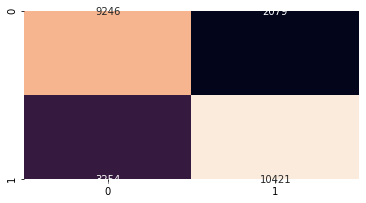

=====LogisticRegression=====
              precision    recall  f1-score   support

           0       0.82      0.85      0.83     12027
           1       0.86      0.82      0.84     12973

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



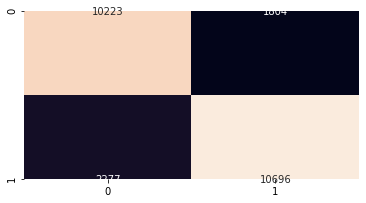

In [45]:
from sklearn.naive_bayes import GaussianNB
#from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import GradientBoostingClassifier

kf=KFold(n_splits=10,shuffle=True)

expect=[]
predict=[]
predict3=[]

for i, j in kf.split(pca_ar_tr):
    tr_data=pca_ar_tr[i]
    tr_target=np.array(sentiment2)[i]
    te_data=pca_ar_tr[j]
    te_target=np.array(sentiment2)[j]
    
    expect.extend(te_target)
    
    classifier=GaussianNB()
    classifier.fit(tr_data,tr_target)
    predict.extend(classifier.predict(te_data))
    
    classifier3=LogisticRegression()
    classifier3.fit(tr_data,tr_target)
    predict3.extend(classifier3.predict(te_data))        
    
print("=====naive bayse=====")
print(metrics.classification_report(predict,expect))
mat1=confusion_matrix(predict,expect)
sns.heatmap(mat1, square=True, annot=True, fmt="d",cbar=False)
plt.show()

print("=====LogisticRegression=====")
print(metrics.classification_report(predict3,expect))
mat3=confusion_matrix(predict3,expect)
sns.heatmap(mat3, square=True, annot=True, fmt="d",cbar=False)
plt.show()  


=========================================================================================

In [46]:
classifier_final=LogisticRegression()
classifier_final.fit(pca_ar_tr,sentiment2)   

C:\Users\susan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
predict_final=classifier_final.predict(pca_ar_te)

In [48]:
predict_final

array([0, 0, 1, ..., 1, 1, 1])

In [49]:
ss=list(map(lambda x: "neg" if x==0 else "pos", list(predict_final)))

In [50]:
s["Label"]=ss
s.to_csv("submission_LR.csv",encoding="utf-8")

=========================================================================================

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn import metrics

Using TensorFlow backend.


In [52]:
print(pca_ar_tr.shape)
print(pca_ar_te.shape)

(25000, 100)
(5986, 100)


In [73]:
model3=Sequential() 
model3.add(Dense(units=100,input_dim=100,kernel_initializer="uniform",activation="relu")) 
model3.add(Dense(units=100,input_dim=100,kernel_initializer="uniform",activation="relu")) 
model3.add(Dense(units=500,kernel_initializer="uniform",activation="relu"))
#model3.add(Dense(units=50,kernel_initializer="uniform",activation="relu"))
model3.add(Dense(units=1,kernel_initializer="uniform",activation="sigmoid"))
model3.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
train_history=model3.fit(x=pca_ar_tr, y=np.array(sentiment2), validation_split=0.1, epochs=20, batch_size=30, verbose=2)

Train on 22500 samples, validate on 2500 samples
Epoch 1/20
 - 1s - loss: 0.4004 - accuracy: 0.8108 - val_loss: 0.2802 - val_accuracy: 0.8884
Epoch 2/20
 - 1s - loss: 0.3564 - accuracy: 0.8416 - val_loss: 0.5015 - val_accuracy: 0.7532
Epoch 3/20
 - 1s - loss: 0.3460 - accuracy: 0.8476 - val_loss: 0.3982 - val_accuracy: 0.8120
Epoch 4/20
 - 1s - loss: 0.3355 - accuracy: 0.8533 - val_loss: 0.4069 - val_accuracy: 0.8104
Epoch 5/20
 - 1s - loss: 0.3237 - accuracy: 0.8596 - val_loss: 0.4786 - val_accuracy: 0.7720
Epoch 6/20
 - 1s - loss: 0.3109 - accuracy: 0.8676 - val_loss: 0.3786 - val_accuracy: 0.8252
Epoch 7/20
 - 1s - loss: 0.2991 - accuracy: 0.8743 - val_loss: 0.3366 - val_accuracy: 0.8584
Epoch 8/20
 - 1s - loss: 0.2878 - accuracy: 0.8807 - val_loss: 0.3431 - val_accuracy: 0.8580
Epoch 9/20
 - 1s - loss: 0.2759 - accuracy: 0.8867 - val_loss: 0.4076 - val_accuracy: 0.8296
Epoch 10/20
 - 1s - loss: 0.2633 - accuracy: 0.8917 - val_loss: 0.3680 - val_accuracy: 0.8444
Epoch 11/20
 - 1s - 

In [74]:
predict_MLP_3=model3.predict(pca_ar_te)

In [78]:
ss=list(map(lambda x: "neg" if x<0.5 else "pos", list(predict_MLP_3)))
s["Label"]=ss
s.to_csv("submission_MLP2.csv",encoding="utf-8")

In [76]:
predict_MLP_3

array([[4.7875792e-01],
       [9.5832348e-04],
       [9.9936318e-01],
       ...,
       [9.8544842e-01],
       [1.0000000e+00],
       [9.9999988e-01]], dtype=float32)